## 1 Problem Definition
( figure out the goals and objectives of what you are trying to solve)<br>
    a. In our case, it’s to **draw the insights about death of people** in the titanic disaster incident based on his/her age, sex, ticket class, socio-economic background and other features and finally, **to be able to make prediction** if a certain person would survive or die.

## 2 Data Collection
   a.  sources of data can be anything like csv, from API, web scraping ,directly from Database using SQL.
  b . in our case, we got it from Kaggle and the file type is csv so we can use pandas read_csv .

## 3 Exploratory Data Analysis

###  3a. importing all necessary libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mlt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

import seaborn as sns
sns.set_style('white')

# from pandas_profiling import ProfileReport
# from ydata_profiling import ProfileReport

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score,confusion_matrix, classification_report

In [2]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler

import pickle 

### 3b. loading necessary files and exploring the data

In [3]:
train_df = pd.read_csv('Titanic Datasets/train.csv')
test_df = pd.read_csv('Titanic Datasets/test.csv')

In [4]:
train_df.name = ' Training dataset '
test_df.name = ' Test dataset '



all_dfs = pd.concat([train_df, test_df], ignore_index = True)

### 3bi Understanding the training dataset



In [5]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
234,235,0,2,"Leyson, Mr. Robert William Norman",male,24.0,0,0,C.A. 29566,10.5000,NaN,S
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.4500,NaN,S
646,647,0,3,"Cor, Mr. Liudevit",male,19.0,0,0,349231,7.8958,NaN,S
322,323,1,2,"Slayter, Miss. Hilda Mary",female,30.0,0,0,234818,12.3500,NaN,Q


**possible questions ??**

- how many data is there? shape of dataset?
- info about columns, how many categorical and how many numerical data?
- what is the target label?
- how many people died and how many survived?


In [6]:
print(f"In total, {train_df.shape[0]} rows and {train_df.shape[1]} columns.")
print()
print()
train_df.info()

In total, 891 rows and 12 columns.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df.describe() # for numerical columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.describe(include = 'O') # for object / categorical columns

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**<font color='red' size = '3'>Some insights till now:</font>**


1) Categorical columns are <b>   'Name', 'Pclass', 'Sex', 'Ticket' , 'Cabin', 'Embarked', 'Parch' , 'SibSp','Survived' </b>
    
2) Numerical columns are <b> 'Age', 'Fare' </b> which is continuous numerical column.
    
3) 'Name' can be said categorical but there are lots of categories, and we don't really need the name column cause survival  rates has nothing to do with the name of passenger; so let's not consider it.
    
4) Age and Cabin and Embarked has missing values which we will have to take care of.

note that: parch and sibsp are numerical categorical columns. eg: parch = 0,1,2 etc
    


In [10]:
train_categorical_col = ['Sex', 'Survived','Pclass','Embarked','Parch','SibSp']
train_numerical_col = ['Age', 'Fare'] 

#### Univariate EDA

<Axes: xlabel='Survived', ylabel='count'>

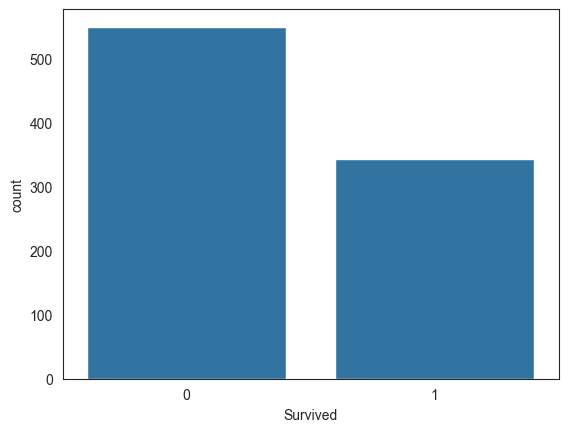

In [11]:
sns.countplot(data = train_df, x = 'Survived')

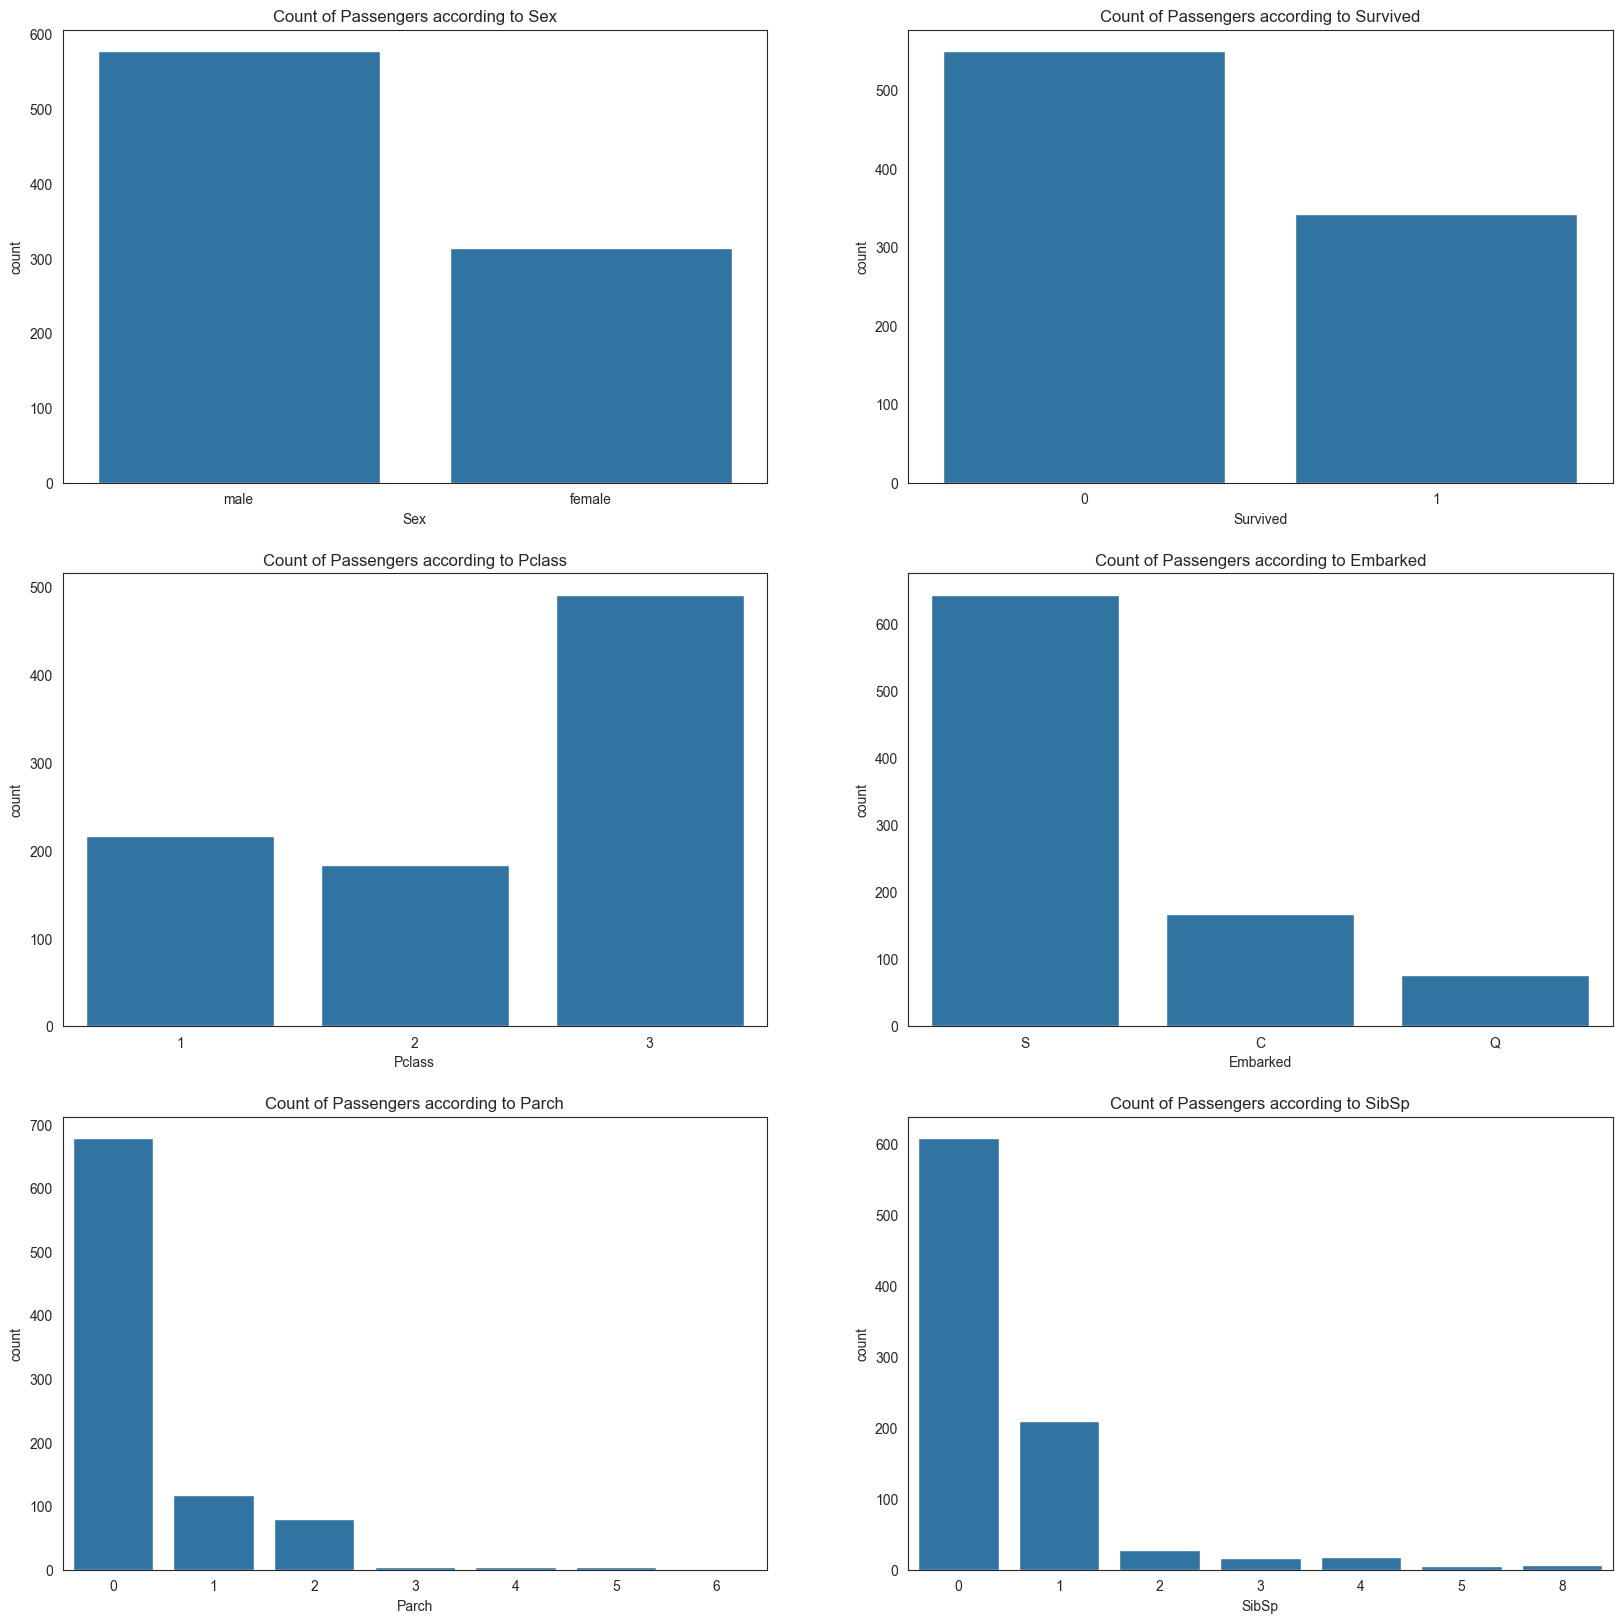

In [12]:
figure,ax = plt.subplots(figsize=(20, 20))
ax.remove()

for index, column in enumerate(train_categorical_col, 1):
    plt.subplot(3, 2, index)
    sns.countplot(data=train_df, x=column)
    plt.title(f"Count of Passengers according to {column}")

plt.show()

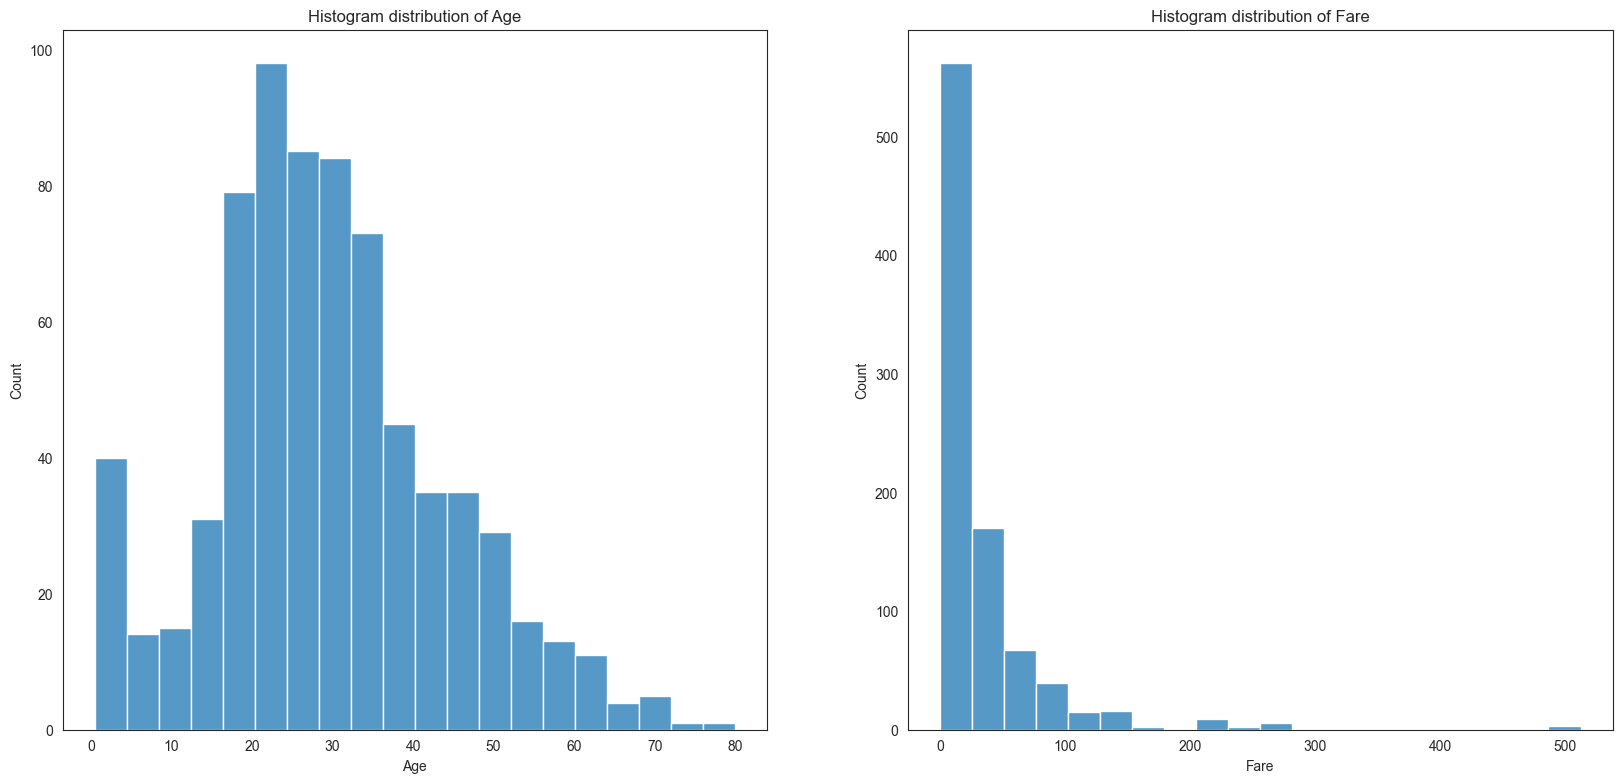

In [13]:
figure,ax = plt.subplots(figsize=(20, 20))
ax.remove()
for index, column in enumerate(train_numerical_col, 1):
    plt.subplot(2, 2, index)
    
    sns.histplot(data = train_df, x = column , bins = 20)    
    plt.title(f"Histogram distribution of {column}")

plt.show()

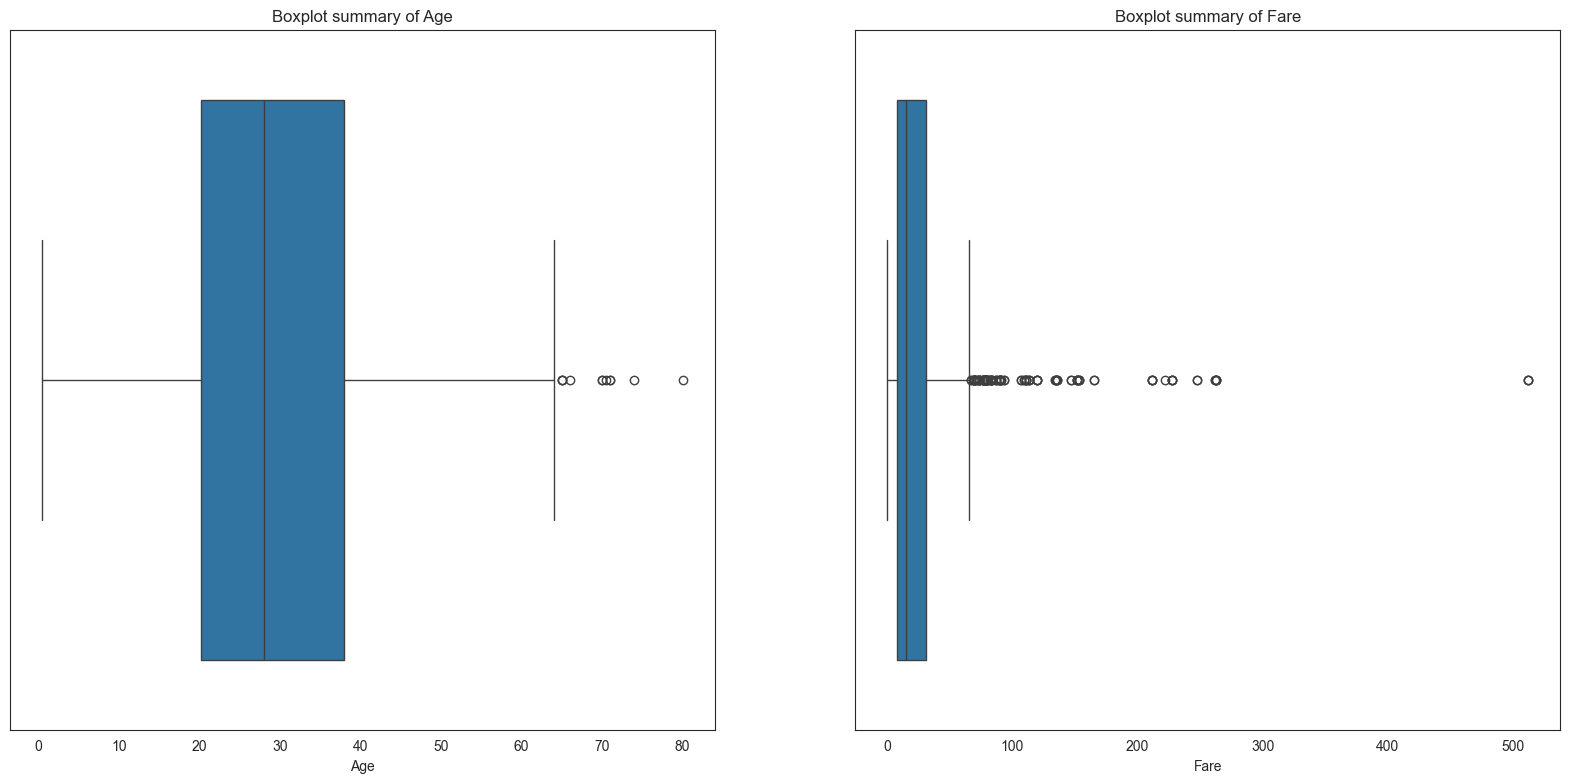

In [14]:
figure,ax = plt.subplots(figsize=(20, 20))
ax.remove()
for index, column in enumerate(train_numerical_col, 1):
    plt.subplot(2, 2, index)
    
    sns.boxplot(data = train_df, x = column )    
    plt.title(f"Boxplot summary of {column}")

plt.show()

**Observations until now on Training Data:**
1) More people died than survived.
2) Large number of people in Pclass 3 and minimum in Pclass 2.
3) Most people embarked from S and least from Q.
4) Huge amount of Parch and SibSp is 0, i.e most people were men, alone and boarded from S. Women were together with their spouse, or children.
5) Mean age acc. to box plot is around 28 and there were some few people with age more than 70, upto 80.
6) 75% of people were below 39 years old.
7) Mean fare price was 32.

**Questions from the observation**
<font color = 'red'>  
    - Need to find fare price according to Pclass, hopefully it will answer the reason behind large number of people in Pclass 3 and unusually less number of people in Pclass 2 <br>
    - any relation between the death of people who embarked from S, Q , C <br>
    

### 3bii Understanding the test dataset

In [15]:
test_df.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
122,1014,1,"Schabert, Mrs. Paul (Emma Mock)",female,35.0,1,0,13236,57.7500,C28,C
265,1157,3,"Lyntakoff, Mr. Stanko",male,NaN,0,0,349235,7.8958,NaN,S
269,1161,3,"Pokrnic, Mr. Mate",male,17.0,0,0,315095,8.6625,NaN,S
364,1256,1,"Harder, Mrs. George Achilles (Dorothy Annan)",female,25.0,1,0,11765,55.4417,E50,C
147,1039,3,"Davies, Mr. Evan",male,22.0,0,0,SC/A4 23568,8.0500,NaN,S


In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [17]:
test_df.shape

(418, 11)

has one column less i.e. there is no Survived column in test data set


In [18]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [19]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
test_categorical_col = ['Sex','Pclass','Embarked','Parch','SibSp']
test_numerical_col = ['Age', 'Fare'] 

**Observations and Differences on Test Data:**
1) Age, Cabin , Fare has missing values [ fare has only one missing value ? what does that mean? one person didn't pay the fare?]
2) there is no survived class.
3) everything else is same. nothing weird.

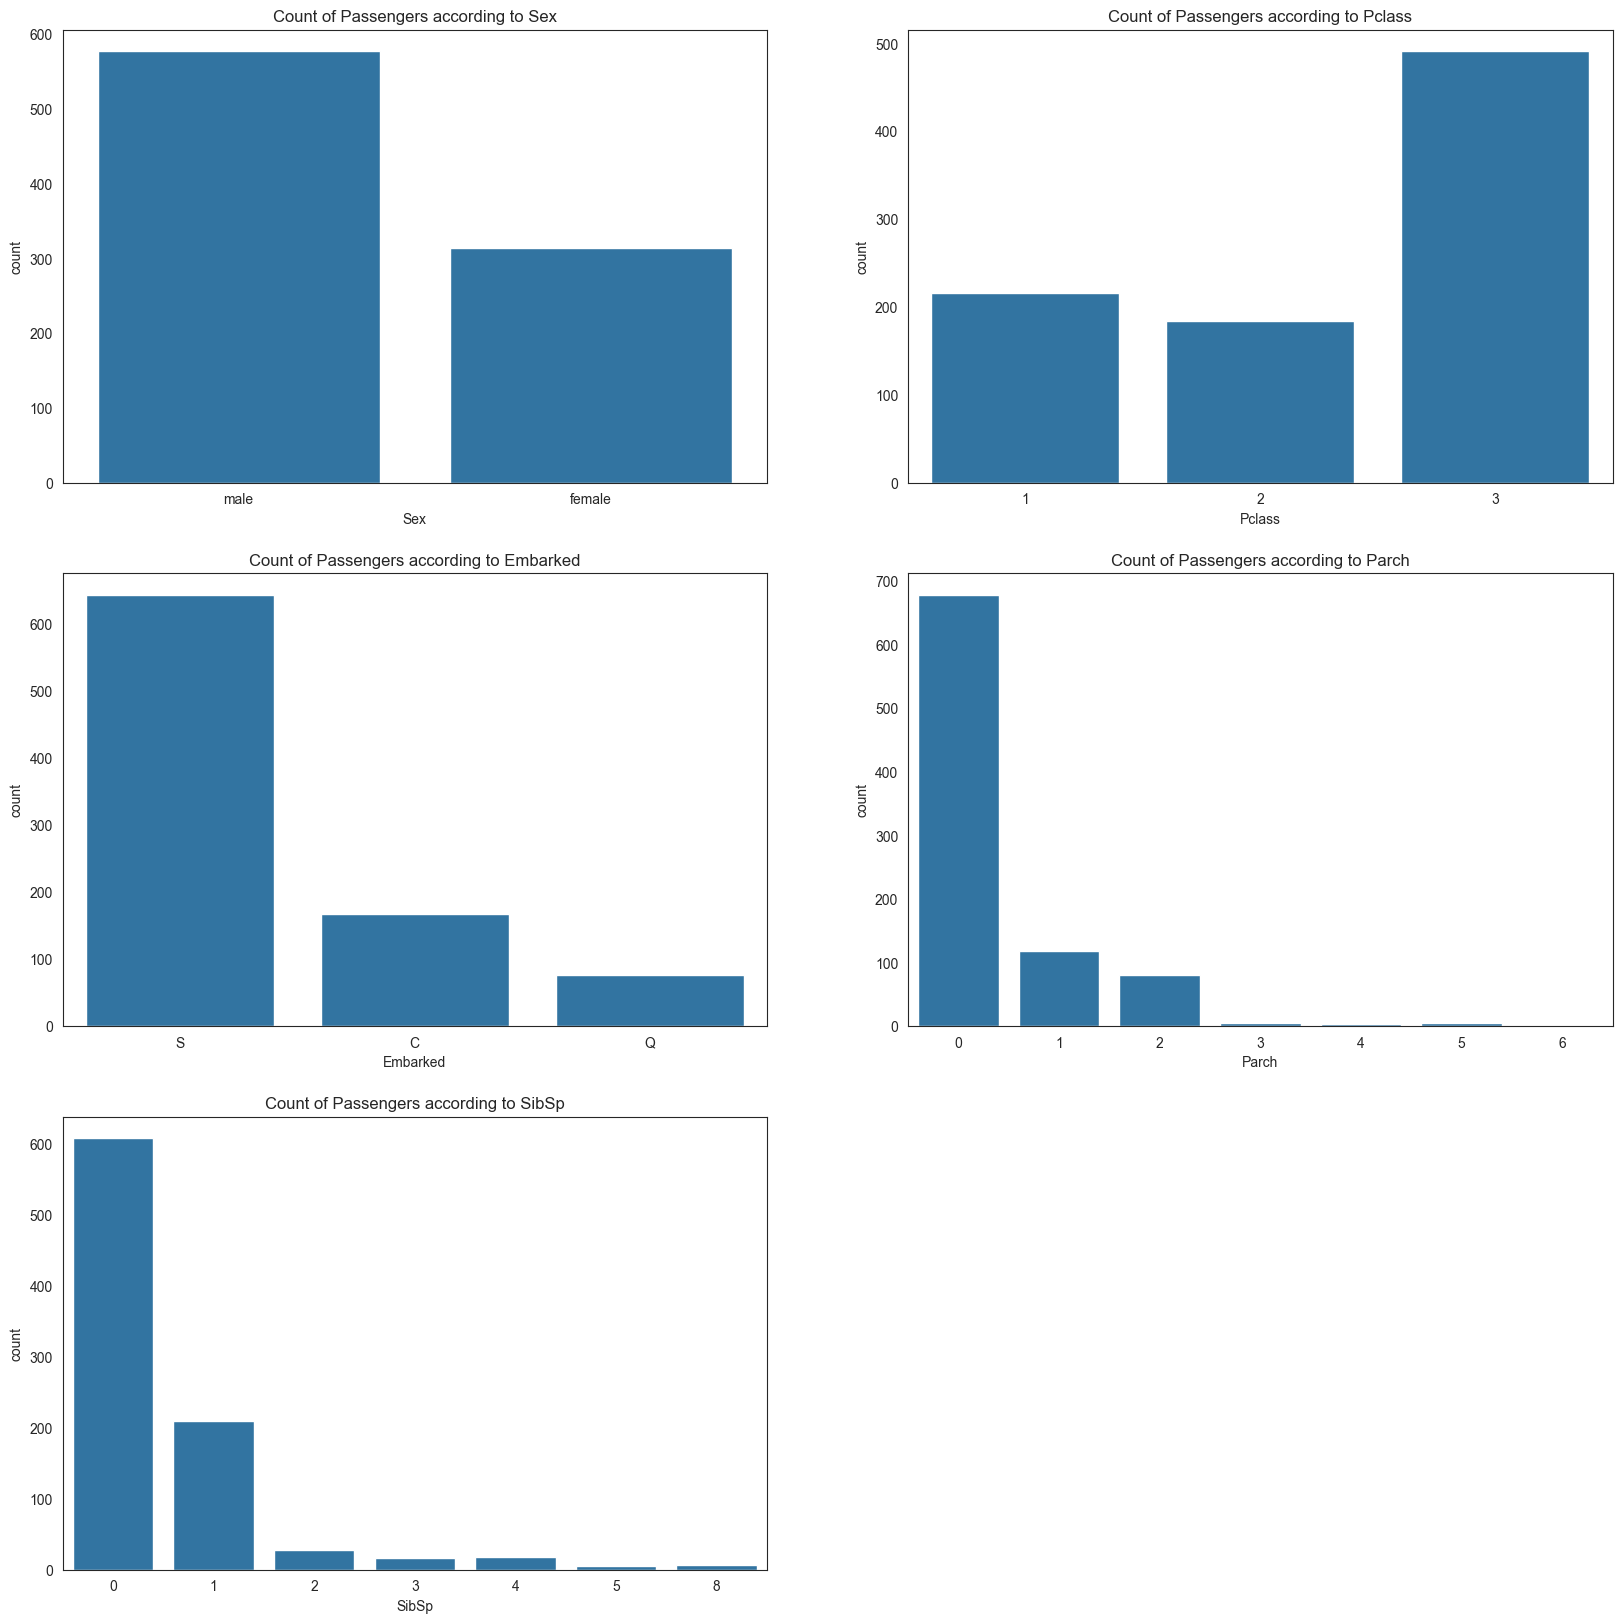

In [21]:
figure,ax = plt.subplots(figsize=(20, 20))
ax.remove()

for index, column in enumerate(test_categorical_col):
    plt.subplot(3, 2, index+1)
    sns.countplot(data=train_df, x=column)
    plt.title(f"Count of Passengers according to {column}")
    
plt.show()

### 3c Clean the data

#### 3ci Duplicated rows

In [22]:
print(f'Training data has {train_df.duplicated().sum()} duplicated rows.')
print()
print(f'Testing data has {test_df.duplicated().sum()} duplicated rows.')


Training data has 0 duplicated rows.

Testing data has 0 duplicated rows.


#### 3cii Outlier Detection

**There are various ways to detect outliers:**
- Z-score for gaussian distribution of data
- IQR method for skewed distribution of data
- Percentile method for other distribution
Let's check the distribution of our numerical columns: using a distplot 

**Note: We already made histogram of age and fare and found that it is skewed distribution so IQR**

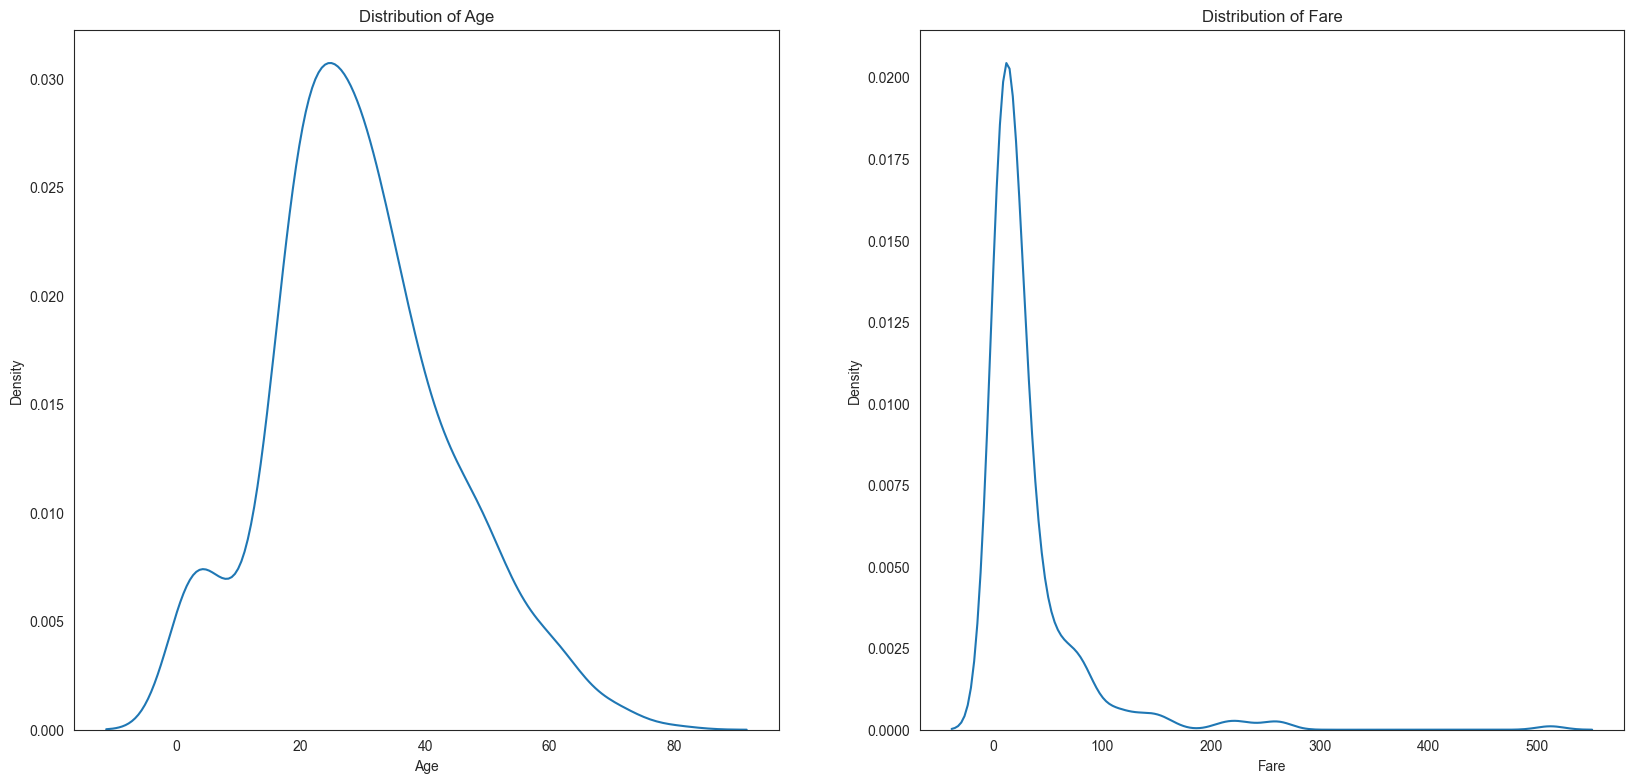

In [23]:
figure,ax = plt.subplots(figsize=(20, 20))
ax.remove()
for index, column in enumerate(train_numerical_col, 1):
    plt.subplot(2, 2, index)
    
    sns.kdeplot(data = train_df, x = column)    
    plt.title(f"Distribution of {column}")

plt.show()

**Ways to deal with outliers:**
- trimming
- capping [if x > u then x = u]


let's go with trimming

Note: 
percentile25 = q1 and percentile75 = q3

In [24]:
for column in train_numerical_col:

    q1 = train_df[column].quantile(0.25)
    q3 = train_df[column].quantile(0.75)
    
    IQR = q3 - q1
    upper_limit = q3 + 1.5 * IQR
    lower_limit = q1 - 1.5 * IQR
        
    
    outliers = train_df[(train_df[column] > upper_limit) | (train_df[column] < lower_limit)]
    
    
#   print(outliers['Age'].duplicated().sum())
    print(f'{column} of training data has {outliers[column].nunique()} outliers.')
    # unique cause in training data, same data can be outlier for age and also for fare
    
    

Age of training data has 7 outliers.
Fare of training data has 45 outliers.


In [25]:
# copy pasta for test data as well

for column in test_numerical_col:

    q1 = test_df[column].quantile(0.25)
    q3 = test_df[column].quantile(0.75)
    
    IQR = q3 - q1
    upper_limit = q3 + 1.5 * IQR
    lower_limit = q1 - 1.5 * IQR
        
    
    outliers = test_df[(test_df[column] > upper_limit) | (test_df[column] < lower_limit)]
    
    
#   print(outliers['Age'].duplicated().sum())
    print(f'{column} of testing data has {outliers[column].nunique()} outliers.')
    # unique cause in testing data, same data can be outlier for age and also for fare
    
    

Age of testing data has 2 outliers.
Fare of testing data has 29 outliers.


#### 3ciii Deal with missing values

In [26]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**as earlier discovered:**

- in training data, age, cabin , embarked has missing values

- in testing data, fare(1 missing value) , age and cabin 


**What to do with missing values?**

- drop cabin cause it's too unreliable even after we fill it's NaN
- fill Age with the median age
- since embarked(2 missing) and fare(1 missing) so, handle them expliclity and individually

In [28]:
# drop cabin
train_df.drop(columns = ['Cabin'], axis = 1, inplace = True)

In [29]:
# drop cabin
test_df.drop(columns = ['Cabin'], axis = 1, inplace = True)

In [30]:
# Fill Age with median
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
test_df['Age'].fillna(test_df['Age'].median(), inplace = True)

In [31]:
# fare
# lets see the details of the person 
test_df[test_df.Fare.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


**since, he embarked from S and was in Pclass 3 , so I'll just fill it's Fare value with the mean fare of (3rd Pclass and embarked from S)**

In [32]:
# mean fare of 3rd class and embarked from S
m = test_df[(test_df['Pclass'] == 3) & (test_df['Embarked'] == 'S')]['Fare'].mean()
m

13.913029787234043

In [33]:
test_df['Fare'].fillna(m, inplace = True)

In [34]:
# embarked
# lets see the details of the person 
train_df[train_df.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


**get details of those person who were in same pclass and survived and whichever is the maximum value of embarked, give it the same value something like KNN**

In [35]:
# survived and pclass 1 
train_df[(train_df.Survived == 1) & (train_df.Pclass == 1)]['Embarked'].value_counts()

Embarked
S    74
C    59
Q     1
Name: count, dtype: int64

In [36]:
# since S has highest so fill missing embarked value with S
train_df['Embarked'].fillna('S', inplace = True)

In [37]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [38]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [39]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### 3d Feature Binning 


**binning the ages into various age groups**

In [40]:
age_range = ['infant','child' , 'young', 'teenager', 'adult', 'elderly adult','old']

age_bin = [0,2,12,18,25,39,64,np.inf]
           
           
train_df['Age'] = pd.cut(train_df['Age'], bins = age_bin, labels = age_range)
test_df['Age'] = pd.cut(test_df['Age'], bins = age_bin, labels = age_range)

In [41]:
test_df['Age'].value_counts()

Age
adult            194
teenager          88
elderly adult     80
young             29
child             15
infant            10
old                2
Name: count, dtype: int64

**binning the Fare prices according to min , 0.25, 0.5, 0.75, max**


In [42]:
mini = train_df['Fare'].min() - 1
q1 = train_df['Fare'].quantile(0.25)
q2 = train_df['Fare'].quantile(0.50) #median
q3 = train_df['Fare'].quantile(0.75)
maxi = train_df['Fare'].max() 

In [95]:
maxi

512.3292

In [43]:
fare_range = [1,2,3,4,5]
fare_bins = [mini,q1,q2,q3,maxi,np.inf]

train_df['Fare_Bin'] = pd.cut(train_df['Fare'], bins = fare_bins, labels = fare_range)

In [44]:
test_df['Fare_Bin'] = pd.cut(test_df['Fare'], bins = fare_bins, labels = fare_range)

In [45]:
train_df[['Fare', 'Fare_Bin']].sample(5)

,Fare,Fare_Bin
457,51.8625,4
804,6.9750,1
21,13.0000,2
406,7.7500,1
601,7.8958,1


In [46]:
train_df.Ticket.nunique() # nah 681 unique values and not categorical and no method to bin it

681

finally, our data looks like:

In [47]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,teenager,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,adult,1,0,PC 17599,71.2833,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,adult,0,0,STON/O2. 3101282,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,adult,1,0,113803,53.1000,S,4
4,5,0,3,"Allen, Mr. William Henry",male,adult,0,0,373450,8.0500,S,2


In [48]:
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_Bin
0,892,3,"Kelly, Mr. James",male,adult,0,0,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,elderly adult,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,elderly adult,0,0,240276,9.6875,Q,2
3,895,3,"Wirz, Mr. Albert",male,adult,0,0,315154,8.6625,S,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,teenager,1,1,3101298,12.2875,S,2


-------------------------------------------------------------------------------------------------------------------------------
**Pandas Profiling**

In [49]:

# report = ProfileReport(train_df)
# report.to_file(output_file='trainreport_output.html')


# report = ProfileReport(test_df)
# report.to_file(output_file='testreport_output.html')

-----------------------------------------------------------------------------------------------------------------------------

### 3e Data Visualization 

lemme drop unnecessary columns like name, ticker and passengerID

In [50]:
train_df.drop(columns = ['PassengerId', 'Name','Ticket'], axis = 1, inplace = True)
test_PassengerId = test_df['PassengerId']
test_df.drop(columns = ['PassengerId', 'Name','Ticket'], axis = 1, inplace = True)

In [51]:
train_df.sample(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Bin
173,0,3,male,teenager,0,0,7.925,S,2
604,1,1,male,adult,0,0,26.550,C,3
260,0,3,male,adult,0,0,7.750,Q,1


In [52]:
test_df.sample(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Bin
293,1,male,elderly adult,1,1,81.8583,S,4
57,3,male,teenager,0,0,7.6500,S,1
228,3,male,elderly adult,0,0,15.1000,S,3


**Multivariate EDA**

In [53]:
# correlation 
train_data_corr = train_df.corr(numeric_only= True).stack().to_frame(name= "correlation_coef")
print(train_data_corr)

                   correlation_coef
Survived Survived          1.000000
         Pclass           -0.338481
         SibSp            -0.035322
         Parch             0.081629
         Fare              0.257307
Pclass   Survived         -0.338481
         Pclass            1.000000
         SibSp             0.083081
         Parch             0.018443
         Fare             -0.549500
SibSp    Survived         -0.035322
         Pclass            0.083081
         SibSp             1.000000
         Parch             0.414838
         Fare              0.159651
Parch    Survived          0.081629
         Pclass            0.018443
         SibSp             0.414838
         Parch             1.000000
         Fare              0.216225
Fare     Survived          0.257307
         Pclass           -0.549500
         SibSp             0.159651
         Parch             0.216225
         Fare              1.000000


<Axes: >

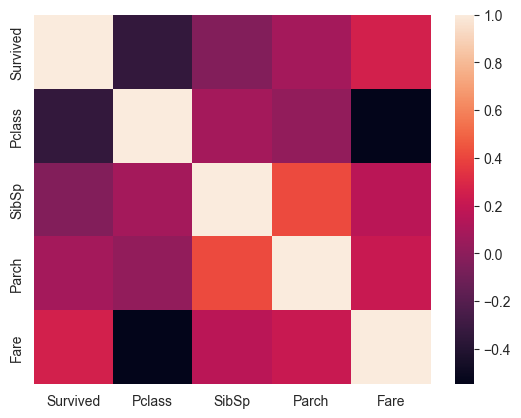

In [54]:
sns.heatmap(train_df.corr(numeric_only = True))

In [55]:
# sns.clustermap(train_df.corr())

In [56]:
# sns.barplot(data = train_df, x = 'Survived',y ='Pclass', hue = 'Embarked')

### 3e Feature Encoding and Engineering

**need to encode embarked, age, sex cause they are categorical but not in number form**

In [57]:
train_df['Sex_Labels'] = train_df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
test_df['Sex_Labels'] = test_df['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [58]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Bin,Sex_Labels
0,3,male,adult,0,0,7.8292,Q,1,1
1,3,female,elderly adult,1,0,7.0000,S,1,0
2,2,male,elderly adult,0,0,9.6875,Q,2,1
3,3,male,adult,0,0,8.6625,S,2,1
4,3,female,teenager,1,1,12.2875,S,2,0


In [59]:
le = LabelEncoder()

In [60]:
train_df['Age_Labels'] = le.fit_transform(train_df['Age'])
test_df['Age_Labels'] = le.fit_transform(test_df['Age'])

In [61]:
train_df['Embarked_Labels'] =  le.fit_transform(train_df['Embarked'])
test_df['Embarked_Labels'] =  le.fit_transform(test_df['Embarked'])

In [62]:
test_df = test_df[['Pclass','Sex_Labels','Age_Labels','Embarked_Labels','Fare_Bin','SibSp','Parch']]

In [63]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Bin,Sex_Labels,Age_Labels,Embarked_Labels
0,0,3,male,teenager,1,0,7.2500,S,1,1,5,2
1,1,1,female,adult,1,0,71.2833,C,4,0,0,0
2,1,3,female,adult,0,0,7.9250,S,2,0,0,2
3,1,1,female,adult,1,0,53.1000,S,4,0,0,2
4,0,3,male,adult,0,0,8.0500,S,2,1,0,2


In [64]:
test_df.sample(5)

,Pclass,Sex_Labels,Age_Labels,Embarked_Labels,Fare_Bin,SibSp,Parch
190,2,1,0,2,3,1,0
251,3,1,5,2,2,0,0
73,1,1,0,0,3,0,0
266,1,1,0,2,1,0,0
191,1,1,0,2,3,0,0


### Let's build the Model

In [65]:
#train_test split
X = train_df[['Pclass','Sex_Labels','Age_Labels','Embarked_Labels','Fare_Bin','SibSp','Parch']].values
y = train_df[['Survived']].values

In [66]:
y = y.ravel() 

In [67]:
SEED_VAL = 345

In [68]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state= SEED_VAL)

In [69]:
X_train.shape

(712, 7)

In [70]:
X_test.shape

(179, 7)

In [71]:
y_train.shape

(712,)

In [72]:
y_test.shape

(179,)

**Cross Validation to find best classification model**

In [73]:

# Create models dict
models= {"KNN": KNeighborsClassifier(), "Logistic Regression": LogisticRegression(), "Decision Tree": DecisionTreeClassifier(),
         "svc": SVC(), "Random Forest": RandomForestClassifier(), "Ada Boost": AdaBoostClassifier(), "gbc": GradientBoostingClassifier()}


for name, model in models.items():
    kf = KFold(n_splits=6, shuffle= True, random_state= SEED_VAL)
    cv_scores= cross_val_score(model, X_train, y_train, cv= kf)
    print(f"{name} val average score: {np.mean(cv_scores)*100 :0.2f} %")




KNN val average score: 78.52 %
Logistic Regression val average score: 78.66 %
Decision Tree val average score: 78.94 %
svc val average score: 80.91 %
Random Forest val average score: 79.22 %
Ada Boost val average score: 78.94 %
gbc val average score: 80.35 %


**See which model gives more accuracy on test set**

In [74]:
for name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)

    # get test performance
    test_model_accuracy= model.score(X_test, y_test)
    print(f"{name} Test set accuracy is: {test_model_accuracy:0.2f}\n")

KNN Test set accuracy is: 0.77

Logistic Regression Test set accuracy is: 0.74

Decision Tree Test set accuracy is: 0.82

svc Test set accuracy is: 0.78

Random Forest Test set accuracy is: 0.76

Ada Boost Test set accuracy is: 0.73

gbc Test set accuracy is: 0.79



In [75]:
# so we go with Decision Tree classifier

decision_model = DecisionTreeClassifier()

In [76]:
decision_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [77]:
y_pred = decision_model.predict(X_test)

In [78]:
accuracy_score(y_test, y_pred)

0.8100558659217877

In [79]:
print("Classification Report: \n", classification_report(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       118
           1       0.71      0.75      0.73        61

    accuracy                           0.81       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.81      0.81      0.81       179



In [80]:
test_y_pred = decision_model.predict(test_df)

C:\Users\1226s\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [81]:
submission= pd.DataFrame({"PassengerId": test_PassengerId, "Survived": test_y_pred})

submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [82]:
submission.to_csv("submission.csv", index= False)

**Pickle Dump**

In [83]:
with open('titanic_model.pkl', 'wb') as file:
    pickle.dump(decision_model, file)

In [84]:
file.close()

<h2>-----ends here----</h2>

In [85]:
train_df.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Bin,Sex_Labels,Age_Labels,Embarked_Labels
475,0,1,male,adult,0,0,52.0,S,4,1,0,2


In [86]:
train_df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Bin,Sex_Labels,Age_Labels,Embarked_Labels
291,1,1,female,teenager,1,0,91.0792,C,4,0,5,0
349,0,3,male,elderly adult,0,0,8.6625,S,2,1,2,2
590,0,3,male,adult,0,0,7.1250,S,1,1,0,2
738,0,3,male,adult,0,0,7.8958,S,1,1,0,2
633,0,1,male,adult,0,0,0.0000,S,1,1,0,2
279,1,3,female,adult,1,1,20.2500,S,3,0,0,2
565,0,3,male,teenager,2,0,24.1500,S,3,1,5,2
390,1,1,male,adult,1,2,120.0000,S,4,1,0,2
756,0,3,male,adult,0,0,7.7958,S,1,1,0,2
699,0,3,male,elderly adult,0,0,7.6500,S,1,1,2,2


In [87]:
train_df[train_df.SibSp == 8]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Bin,Sex_Labels,Age_Labels,Embarked_Labels
159,0,3,male,adult,8,2,69.55,S,4,1,0,2
180,0,3,female,adult,8,2,69.55,S,4,0,0,2
201,0,3,male,adult,8,2,69.55,S,4,1,0,2
324,0,3,male,adult,8,2,69.55,S,4,1,0,2
792,0,3,female,adult,8,2,69.55,S,4,0,0,2
846,0,3,male,adult,8,2,69.55,S,4,1,0,2
863,0,3,female,adult,8,2,69.55,S,4,0,0,2


In [88]:
train_df.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [89]:
train_df.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [96]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.3.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\1226s\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 
